<a href="https://colab.research.google.com/github/annasvenbro/etudesnordiques/blob/main/Test_suecana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Requêter *Suecana extranea* via l'API de Libris pour analyser la réception des ouvrages suédois en traduction française ou sur la Suède depuis 1868

*Suecana extranea* est une bibliographie nationale suédoise (nom tiré du latin *Suecia* / Suède) recensant et décrivant toutes les publications originalement en suédois publiées en traduction à l'étranger, et tous les ouvrages parlant de la Suède publiés à l'étranger. Elle fait à présent partie du catalogue collectif suédois Libris, interrograble via une API en JSON.

##Import des bibliothèques nécessaires à l'analyse

In [ ]:
import requests as rq #Requêtes HTTP en Python
import json #JSON (format de sortie de l'API) pour Python.
import json.decoder #Pour décoder les flux en JSON.
import pandas as pd #Pour créer des dataframes pour pouvoir analyser les données.
#https://libris.kb.se/xsearch?query=db:(suec)+spr:(fre)+ar:(2022)&n=200 est l'adresse de l'API de Libris qu'on va utiliser : elle recense tous les éléments de suecana extranea en français pour 2022, avec une limitation à 200 (ça n'arrivera jamsi jusque là).

##Première requête : on veut savoir combien d'ouvrages suédois traduits en français et d'ouvrages en français parlant de la Suède ont été publiés en 2022

In [ ]:
suecana_2022=rq.get("https://libris.kb.se/xsearch?query=db:(suec)+spr:(fre)+ar:(2022)&format=json&n=200") #On requête l'API mentionnée en commentaire dans le bloc précédent.
suecana_2022_json=suecana_2022.json() #On présente en JSON la liste des publications.
suecana_2022_json #On l'affiche.

{'xsearch': {'from': 1,
  'to': 61,
  'records': 61,
  'list': [{'identifier': 'http://libris.kb.se/bib/xdq1322fv4675qxd',
    'title': 'Le portrait de Greta G. : roman',
    'creator': 'Locandro, Catherine',
    'isbn': '9791025205655',
    'type': 'book',
    'publisher': ['Paris : Éditions Les Pérégrines', ''],
    'date': ['[2022]', '©2022'],
    'language': 'fre',
    'description': 'Imported from: zcat.oclc.org:210/OLUCWorldCat (Do not remove)'},
   {'identifier': 'http://libris.kb.se/bib/dt0zfppzbqgj50ts',
    'title': 'À la vie à la mort',
    'creator': 'Gärdenfors, Simon, 1978-',
    'isbn': '9791096119462',
    'type': 'book',
    'publisher': ['[Paris] : Revival', ''],
    'date': ['[2022]', '2022'],
    'language': 'fre'},
   {'identifier': 'http://libris.kb.se/bib/1ht463lhzzw13btb',
    'title': 'Suédois',
    'creator': 'Lincken, Piet, 1969-',
    'isbn': '9791031205335',
    'type': 'book',
    'publisher': ['Paris : HD, ateliers Henry Dougier', ''],
    'date': ['[2022

In [ ]:
nb_2022=suecana_2022_json["xsearch"]["records"] #Maintenant, à partir de la construction du résultat de la reuqête en JSON, on extrait le nombre de publications dans la liste.
nb_2022#On affiche le résultat.

61

In [ ]:
suecana_2022_json["xsearch"]["list"][34]["creator"] #On peut voir quel est l'auteur du 34e résultat de la liste de publications.

'Péneau, Corinne, 1971-'

##Fonction : on veut requêter le nombre d'ouvrages suédois traduits en français et d'ouvrages en français parlant de la Suède quelle que soit l'année

In [ ]:
def get_suecana(annee):
  req=rq.get(f"https://libris.kb.se/xsearch?query=db:(suec)+spr:(fre)+ar:({annee})&format=json&n=200")
  req=req.json()
  return req["xsearch"]["records"]

In [ ]:
get_suecana(1979) #Un exemple de ce que donne cette fonction pour 1979.

57

##On va étudier l'évolution du nombre de publications françaises présentes dans *Suecana extranea* depuis une date donnée (par exemple la date du don Dezos de la Roquette)

In [ ]:
dict_suecana={} #On crée une variable (un dictionnaire) pour avoir les résultats de la requête par année. On l'initialise d'abord.
for annee in range(1868,2023) : #On fait une boucle en for en fonction de l'année (de 1990 jusqu'à 2023-1=2022).
  publications=get_suecana(annee)
  dict_suecana[annee]=publications#On construit notre dictionnaire par année.

In [ ]:
dict_suecana #On affiche le résultat.

{1868: 0,
 1869: 1,
 1870: 0,
 1871: 0,
 1872: 3,
 1873: 0,
 1874: 0,
 1875: 1,
 1876: 0,
 1877: 1,
 1878: 2,
 1879: 4,
 1880: 1,
 1881: 1,
 1882: 2,
 1883: 3,
 1884: 1,
 1885: 4,
 1886: 3,
 1887: 3,
 1888: 1,
 1889: 2,
 1890: 1,
 1891: 2,
 1892: 4,
 1893: 0,
 1894: 6,
 1895: 2,
 1896: 1,
 1897: 3,
 1898: 6,
 1899: 2,
 1900: 8,
 1901: 9,
 1902: 5,
 1903: 2,
 1904: 4,
 1905: 0,
 1906: 0,
 1907: 6,
 1908: 3,
 1909: 12,
 1910: 13,
 1911: 9,
 1912: 4,
 1913: 5,
 1914: 1,
 1915: 2,
 1916: 0,
 1917: 0,
 1918: 2,
 1919: 2,
 1920: 4,
 1921: 3,
 1922: 4,
 1923: 4,
 1924: 7,
 1925: 2,
 1926: 7,
 1927: 9,
 1928: 3,
 1929: 8,
 1930: 4,
 1931: 2,
 1932: 3,
 1933: 5,
 1934: 1,
 1935: 5,
 1936: 1,
 1937: 6,
 1938: 5,
 1939: 5,
 1940: 5,
 1941: 0,
 1942: 3,
 1943: 2,
 1944: 4,
 1945: 8,
 1946: 10,
 1947: 17,
 1948: 8,
 1949: 8,
 1950: 8,
 1951: 5,
 1952: 8,
 1953: 1,
 1954: 8,
 1955: 4,
 1956: 5,
 1957: 9,
 1958: 13,
 1959: 11,
 1960: 15,
 1961: 13,
 1962: 11,
 1963: 14,
 1964: 13,
 1965: 11,
 1966: 1

In [ ]:
df_suecana = pd.DataFrame.from_dict([dict_suecana]) #On transforme ce dictionnaire en dataframe.
df_suecana #On affiche le dataframe.

,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,1,0,0,3,0,0,1,0,1,...,145,113,180,158,138,128,167,105,101,61


In [ ]:
df_suecana=df_suecana.transpose() #On transpose les lignes et les colonnes.
df_suecana #On affiche la nouvelle version du dataframe.

,0
1868,0
1869,1
1870,0
1871,0
1872,3
...,...
2018,128
2019,167
2020,105
2021,101


In [ ]:
df_suecana= df_suecana.rename_axis("Date").reset_index() #On va indexer sur les dates.
df_suecana= df_suecana.set_index("Date") #On va renommer la colonne d'index avec "Date".
df_suecana.columns=["Publications"] #On va renommer la colonne de résultat en "Publications".
df_suecana #On affiche le résultat.

,Publications
Date,
1868,0
1869,1
1870,0
1871,0
1872,3
...,...
2018,128
2019,167
2020,105


##Représentations graphiques

###À partir du module de représentation de pandas

In [ ]:
from pandas import plotting #On importe la méthode plotting de pandas.

<Axes: xlabel='Date'>

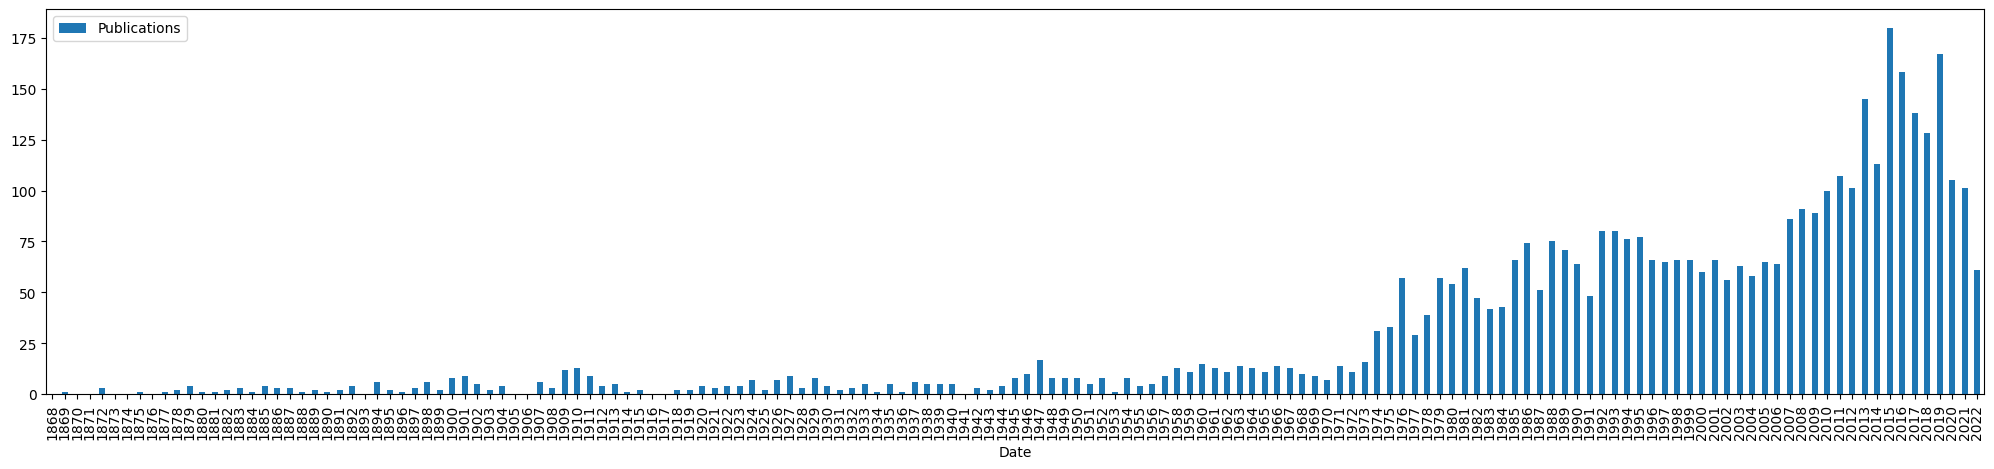

In [ ]:
df_suecana.plot(figsize=(25,5),kind="bar")#On trace un diagramme en barres à partir du dataframe précédent.

###Avec pyplot

In [ ]:
import matplotlib.pyplot as plt #On importe la méthode pyplot de matplotlib.

<Figure size 2500x500 with 0 Axes>

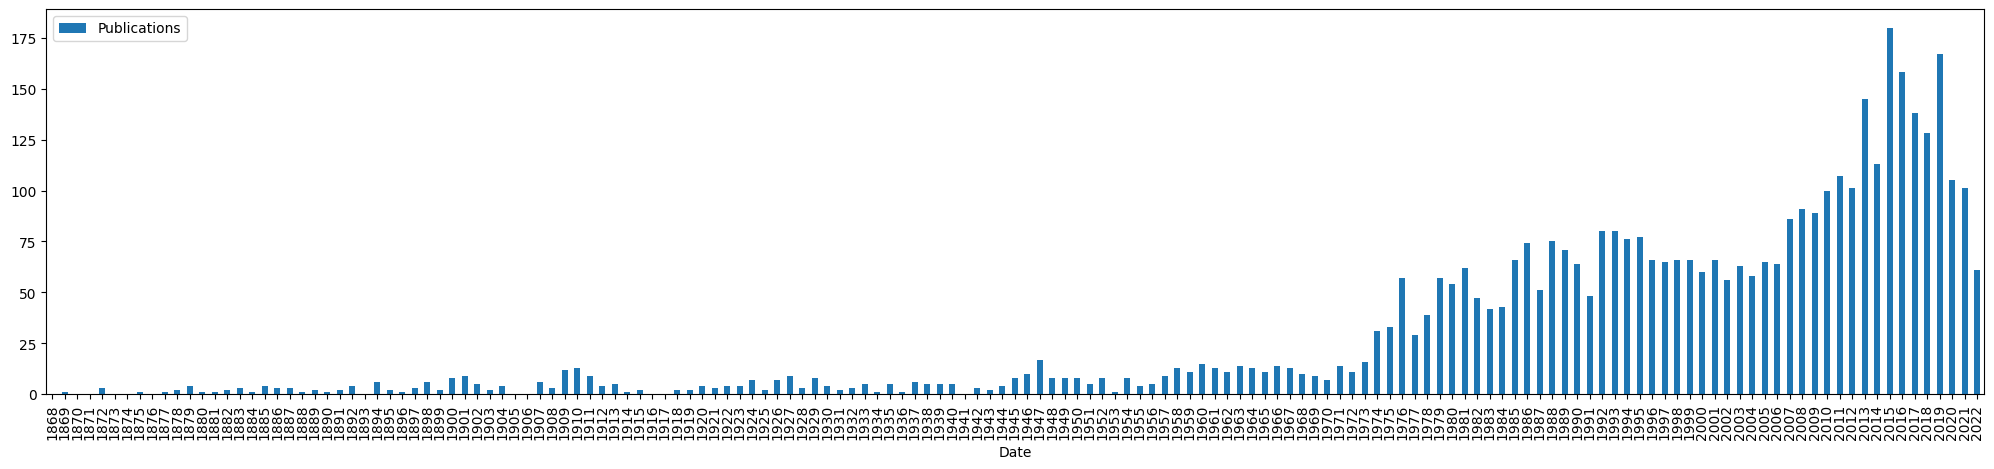

In [ ]:
plt.clf() #Effacer les représentations précédentes.
plt.rcParams["figure.figsize"]=[25, 5]
df_suecana.plot.bar()
plt.show()